In [1]:
#!npm install react react-dom @xyflow/react @anywidget/react

In [2]:
import sys
from pathlib import Path

sys.path.insert(0, str(Path(Path.cwd())))

In [3]:
!npx esbuild js/widget.jsx --minify --format=esm --bundle --outdir=pyironflow/static


  pyironflow/static/widget.js    1.7mb ⚠️
  pyironflow/static/widget.css  15.7kb

⚡ Done in 443ms


In [4]:
from pyiron_workflow import Workflow
#from typing import Optional
from pyironflow.pyironflow import PyironFlow
#from pyironflow.macro import get_node_instance_type

#from pyiron_workflow import Workflow
#from pyiron_workflow.channels import NotData
#from pyironflow.themes import get_color
#from pyironflow.macro import get_node_instance_type
#from pyironflow.wf_extensions import get_import_path, create_macro

import anywidget
import pathlib
import traitlets
import os
import json
import importlib
import typing


In [5]:
wf = Workflow('lammps_macro')

In [6]:
from pyiron_workflow import as_function_node
import typing
from typing import Optional

@as_function_node()
def add_1(a: Optional[float | int] = None):
    return a+1

In [7]:
from pyiron_workflow import as_function_node, as_macro_node
import typing
from typing import Optional

@as_function_node()
def part_1(a: float | int = 0):
    out = a+1
    return out

@as_function_node()
def part_2(a: float | int = 0):
    out = a+2
    return out

@as_function_node()
def part_3(a: float | int = 0):
    out = a+3
    return out

@as_function_node()
def part_4(a: float | int = 0, b: float | int = 0):
    out = a+b
    return out

@as_macro_node()
def macro_add(wf, a: int = 0):

    # imports

    wf.one = part_1(a)
    wf.two = part_2(wf.one)
    wf.three = part_3(wf.two)
    
    return wf.three

@as_macro_node()
def macro_addmore(wf, a: int = 0, b: int = 0):

    # imports

    wf.in1 = part_1(a)
    wf.in2 = part_2(b)
    wf.out = part_4(wf.in1, wf.in2)
    
    return wf.out


@as_macro_node()
def macro_visual(wf, a: int = 0, b: int = 0, c: int = 0):

    # imports

    wf.in1 = part_1(a)
    wf.calc1 = part_4(wf.in1, b)
    wf.calc2 = part_2(c)
    wf.outNode = part_4(wf.calc1, wf.calc2)
    
    return wf.outNode
    


wf.add1 = add_1()
wf.add2 = add_1(wf.add1)
wf.add3 = add_1()

#wf.add5 = add_1()
#wf.add6 = add_1()


#wf.macro2 = macro_add(wf.macro1)

wf.macro = macro_visual(wf.add2,wf.add3)
#wf.macro2 = macro_addmore(wf.add5,wf.add6)

wf.add4 = add_1(wf.macro)




In [8]:
wf.macro.inputs.a

In [9]:
#print(dir(wf.macro.outputs.out))

AttributeError: Could not find attribute out on OutputsWithInjection object nor in its channels (['outNode'])

In [ ]:
wf.macro.inputs.b._value_receiver.full_label

In [ ]:
print(wf.add4.inputs.a._value_receiver)

In [10]:
wf.macro

In [39]:
print(wf.macro)

macro (macro_visual):
Inputs ['a', 'b', 'c']
OutputsWithInjection ['out']
InputSignals ['run', 'accumulate_and_run']
OutputSignals ['ran', 'failed']


In [79]:
for n in wf.macro.inputs:
    print(n._value_receiver.full_label)

/lammps_macro/macro/in1.a
/lammps_macro/macro/calc1.b
/lammps_macro/macro/calc2.a


In [24]:
#for n in wf.macro.children.items():
#    for m in n.outputs:
#        print(m._value_receiver.full_label)


for i, (k, v) in enumerate(wf.macro.children.items()):
    print(v)
    for n in v.inputs:
        #if n.connections == []
        print(n.label)
        print(n._value_receiver) 

in1 (part_1):
Inputs ['a']
OutputsWithInjection ['out']
InputSignals ['run', 'accumulate_and_run']
OutputSignals ['ran', 'failed']
a
None
calc1 (part_4):
Inputs ['a', 'b']
OutputsWithInjection ['out']
InputSignals ['run', 'accumulate_and_run']
OutputSignals ['ran', 'failed']
a
None
b
None
calc2 (part_2):
Inputs ['a']
OutputsWithInjection ['out']
InputSignals ['run', 'accumulate_and_run']
OutputSignals ['ran', 'failed']
a
None
out (part_4):
Inputs ['a', 'b']
OutputsWithInjection ['out']
InputSignals ['run', 'accumulate_and_run']
OutputSignals ['ran', 'failed']
a
None
b
None


In [19]:
for n in wf.macro:
    for m in n.inputs.channels:
        print(m)

AttributeError: Could not find attribute channels on Inputs object nor in its channels (['a'])

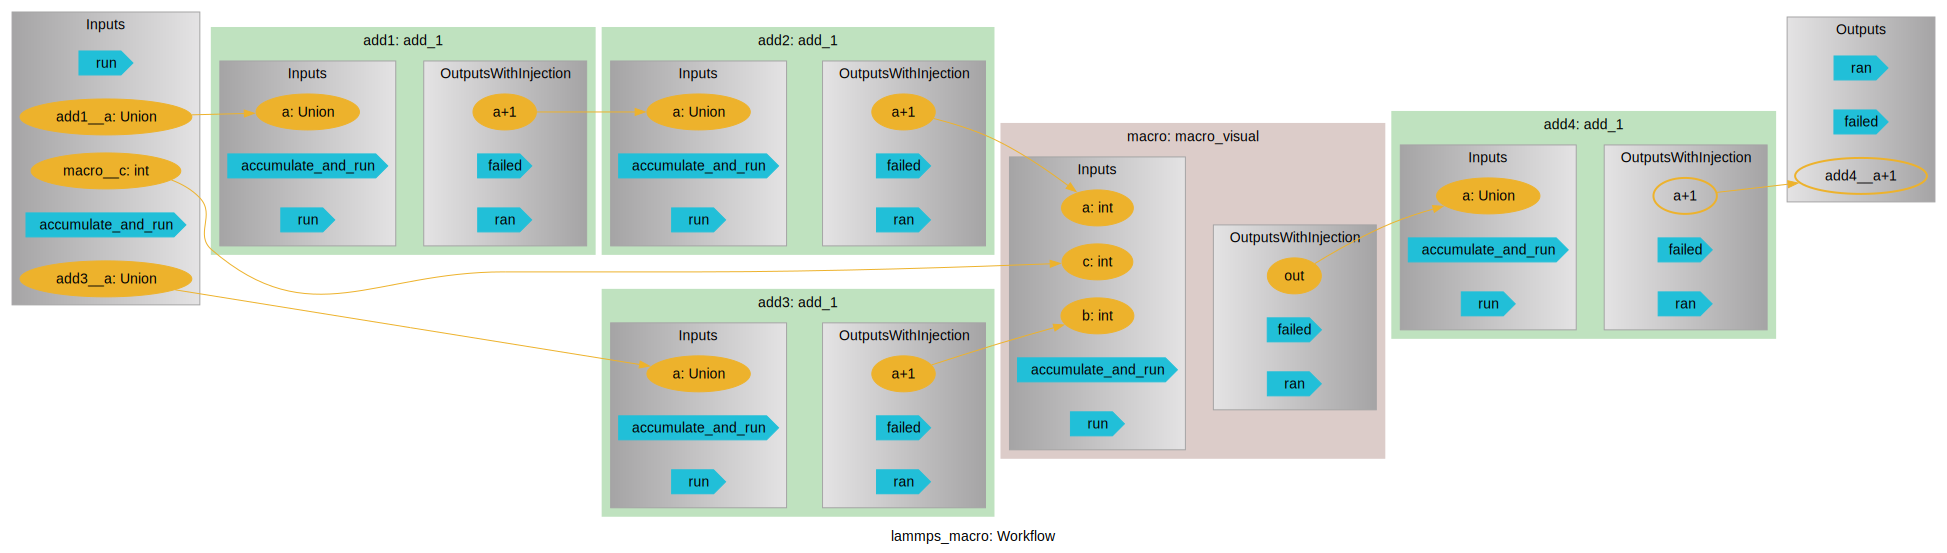

In [27]:
wf.draw()

In [41]:
for i, (k, v) in enumerate(wf.macro.children.items()):
    for n in v.inputs:
        if n.connections == []
            print 
    print(v.inputs.connections)


[]
[]
[<pyiron_workflow.mixin.injection.OutputDataWithInjection object at 0x7f0f05762150>, <pyiron_workflow.mixin.injection.OutputDataWithInjection object at 0x7f0f05761d60>]


In [39]:
wf.macro.in1.inputs.connections

[]

In [8]:
pf = PyironFlow([wf])
pf.gui

In [ ]:
    for ic, (out, inp) in enumerate(wf.macro1.graph_as_dict["edges"]["data"].keys()):
        out_node, out_port = out.split('/')[-1].split('.')
        inp_node, inp_port = inp.split('/')[-1].split('.')
        # print(out_node, out_port, inp_node, inp_port)
        print(out, inp)

In [24]:
wf

In [15]:
wf.macro.graph_as_dict["nodes"]

{'/lammps_macro/macro/in1': <__main__.part_1 at 0x7f5697b1d130>,
 '/lammps_macro/macro/calc1': <__main__.part_4 at 0x7f56c76316d0>,
 '/lammps_macro/macro/calc2': <__main__.part_2 at 0x7f5697b1da00>,
 '/lammps_macro/macro/out': <__main__.part_4 at 0x7f5697b1deb0>}

In [18]:
list(wf.macro.inputs.channel_dict.keys())

['a', 'b', 'c']

In [ ]:
pf.wf_widgets[0].gui.expanded_macros

In [ ]:
pf.get_workflow()
[['add1', 'add3'], ['add2', 'macro1'], ['macro1', 'macro2'], ['macro2'], []]

In [ ]:
list(wf.macro1.inputs.channel_dict.keys())

In [ ]:
for target in wf.macro1.outputs.channel_dict.keys():
    print(target)

In [ ]:
for target in wf.macro1.outputs.channel_dict.keys():
    print(target)

In [ ]:
from pyiron_nodes.custom_macro import custom_macro

In [ ]:
    for i, (k, v) in enumerate(wf.children.items()):
        for ic, (out, inp) in enumerate(v.graph_as_dict['edges']['data']):
            print(ic, out, inp)
            last = max(len(out.split('/')) -1, 0) 
            out_node, out_port = out.split('/')[last].split('.')
            inp_node, inp_port = inp.split('/')[last].split('.')

In [ ]:
for i, (k, v) in enumerate(wf.children.items()):
    print(v.graph_as_dict)

In [ ]:
for i, (k, v) in enumerate(wf.children.items()):
    print(v)

In [9]:
 json.loads(pf.wf_widgets[0].gui.nodes)

[{'id': 'add1',
  'data': {'label': 'add1',
   'source_labels': ['a+1'],
   'target_labels': ['a'],
   'import_path': '__main__.add_1',
   'target_values': [None],
   'target_types': ['int'],
   'target_literal_values': [None],
   'target_literal_types': [None],
   'source_values': ['NotData'],
   'source_types': ['None'],
   'failed': 'False',
   'running': 'False',
   'ready': 'False',
   'cache_hit': 'False',
   'python_object_id': 140450598863168},
  'position': {'x': 0, 'y': 0},
  'type': 'customNode',
  'style': {'padding': 5,
   'background': '#a2ea9f',
   'borderRadius': '10px',
   'width': '240PX',
   'width_unitless': 240,
   'height': '56px',
   'height_unitless': 56},
  'targetPosition': 'left',
  'sourcePosition': 'right',
  'measured': {'width': 240, 'height': 56}},
 {'id': 'add2',
  'data': {'label': 'add2',
   'source_labels': ['a+1'],
   'target_labels': ['a'],
   'import_path': '__main__.add_1',
   'target_values': [None],
   'target_types': ['int'],
   'target_litera

In [9]:
json.loads(pf.wf_widgets[0].gui.edges)

[{'source': 'add1',
  'sourceHandle': 'a+1',
  'target': 'add2',
  'targetHandle': 'a',
  'id': 0,
  'type': ['edge'],
  'parent': [],
  'style': {'stroke': 'black', 'strokeWidth': 2}},
 {'source': 'add2',
  'sourceHandle': 'a+1',
  'target': 'macro',
  'targetHandle': 'a',
  'id': 1,
  'type': ['edge'],
  'parent': [],
  'style': {'stroke': 'black', 'strokeWidth': 2}},
 {'source': 'add3',
  'sourceHandle': 'a+1',
  'target': 'macro',
  'targetHandle': 'b',
  'id': 2,
  'type': ['edge'],
  'parent': [],
  'style': {'stroke': 'black', 'strokeWidth': 2}},
 {'source': 'macro',
  'sourceHandle': 'out',
  'target': 'add4',
  'targetHandle': 'a',
  'id': 3,
  'type': ['edge'],
  'parent': [],
  'style': {'stroke': 'black', 'strokeWidth': 2}},
 {'source': 'in1',
  'sourceHandle': 'a+1',
  'target': 'calc1',
  'targetHandle': 'a',
  'id': 4,
  'type': ['macroSubEdge'],
  'parent': ['macro'],
  'style': {'stroke': 'black', 'strokeWidth': 2}},
 {'source': 'calc1',
  'sourceHandle': 'a+b',
  'tar

In [ ]:
wf.plus1 = part_1()
wf.plus2 = part_2()
wf.plus3 = part_3()

In [ ]:
wf.add5 = add_1()

In [ ]:
wf.macro2 = macro_add(wf.macro1)

In [ ]:
wf.macro3 = custom_macro()

In [ ]:
pf.wf_widgets[0].update()

In [ ]:
json.loads(pf.wf_widgets[0].gui.nodes)

In [ ]:
@as_macro_node()
def macro_ception(wf, a: int = 0, b: int = 0):

    # imports

    #wf.one = part_1(a)
    #wf.two = part_2(b)
    wf.macro_inner = macro_addmore(a,b)
    wf.add_out = part_1(wf.macro_inner)
    
    return wf.add_out


In [ ]:
wf2 = Workflow('macro_in_macro')

wf2.macro1 = macro_ception()

pf2 = PyironFlow([wf2])
pf2.gui

In [ ]:
json.loads(pf.wf_widgets[0].gui.nodes)

In [ ]:
pf.wf_widgets[0].wf

In [ ]:
pf.wf_widgets[0].update()

In [ ]:
pf.wf_widgets[0].wf.add2 = add_1()

In [ ]:
wf.add1 = add_1()

In [ ]:
wf.add2 = add_1()

In [ ]:
pf.wf_widgets[0].add_node(add_1, "add1")

In [ ]:
pf.wf_widgets[0].gui.edges

In [ ]:
get_node_instance_type(wf.add1)

In [ ]:
get_edges(wf)

In [ ]:
for ic, (out, inp) in enumerate(wf.add1.graph_as_dict['edges']['data']):
    print(ic, out, inp)
    last = max(len(out.split('/')) -1, 0) 
    out_node, out_port = out.split('/')[last].split('.')
    print(out_node, out_port)

In [ ]:
for i, (k, v) in enumerate(wf.children.items()):
    print(k)

In [ ]:
def get_edges(wf):
    edges = []
    for ic, (out, inp) in enumerate(wf.graph_as_dict["edges"]["data"].keys()):
        out_node, out_port = out.split('/')[2].split('.')
        inp_node, inp_port = inp.split('/')[2].split('.')

        edge_dict = dict()
        edge_dict["source"] = out_node
        edge_dict["sourceHandle"] = out_port
        edge_dict["target"] = inp_node
        edge_dict["targetHandle"] = inp_port
        edge_dict["id"] = ic
        edge_dict["style"] = {'strokeWidth': 2, 'stroke': 'black',}

        edges.append(edge_dict)
    return edges


In [ ]:
get_edges(wf)

In [ ]:
edges = []
for i, (k, v) in enumerate(wf.children.items()):
    #print(v)
    #print(get_node_instance_type(v))
    if (get_node_instance_type(v) == 'macro'):
        for ic, (out, inp) in enumerate(v.graph_as_dict['edges']['data']):
            print(ic, out, inp)
            last = max(len(out.split('/')) -1, 0) 
            out_node, out_port = out.split('/')[last].split('.')
            inp_node, inp_port = inp.split('/')[last].split('.')
                
            edge_dict = dict()
            edge_dict["source"] = out_node
            edge_dict["sourceHandle"] = out_port
            edge_dict["target"] = inp_node
            edge_dict["targetHandle"] = inp_port
            edge_dict["id"] = ic
            edge_dict["style"] = {'strokeWidth': 2, 'stroke': 'black',}
    
            edges.append(edge_dict)
print(edges)

In [ ]:
for ic in enumerate(wf.graph_as_dict):
    print(ic)

In [ ]:
pf.wf_widgets[0].gui.edges

In [ ]:
pf.wf_widgets[0].gui.nodes = '[{"id":"add","data":{"label":"add"},"position":{"x":0,"y":100},"type":"group","style":{"border":"1px black solid","padding":5,"background":"#a2ea9f","borderRadius":"10px","width":"240px"},"measured":{"width":240,"height":12}},{"id":"add2","data":{"label":"add2"},"position":{"x":0,"y":100},"type":"custom_node", parentId: "add", extent: "parent", "style":{"border":"1px black solid","padding":5,"background":"#a2ea9f","borderRadius":"10px","width":"240px"},"measured":{"width":240,"height":12}}]'

In [ ]:
wf.macro = macro_add()

In [ ]:


flow_widget.add_node(str(path_str), node.path.name)


In [ ]:
from pyiron_workflow import as_function_node
import typing
from typing import Optional

@as_function_node()
def add_1(a: Optional[float | int] = None):
    return a+1

In [ ]:
wf.add1 = add_1()

In [ ]:
pf.wf_widgets[0].wf.add1 = add_1()

In [ ]:
wf.add2 = add_1()

In [ ]:
len(list(wf.macro))

In [ ]:
wf

In [ ]:
list(wf.macro)[0]

In [ ]:
import json

nodes = "[{'id': '1','data': { 'label': 'Hello' },'position': { 'x': 0, 'y': 0 },},]"

nodes_json = json.dumps(nodes)
wf.nodes = nodes_json

In [ ]:
wf

In [ ]:
    {
      'id': '1-a',
      'data': { 'label': 'message' },
      'position': { 'x': 250, 'y': 100 },
      'type': 'output',
      'parentId': '1',
      'extent': 'parent',
      'targetPosition': 'left',      
    },
    {
      'id': '1-b',
      'data': { 'label': 'Child Node 1' },
      'position': { 'x': 0, 'y': 100 },
      'type': 'input',
      'parentId': '1',
      'extent': 'parent',
      'targetPosition': 'left',  
    },

In [ ]:
Macro into default node

internal nodes

hidden button

connection validation

In [ ]:
no interactivity with expanded macro

In [ ]:
wf = pf.get_workflow()

In [ ]:
import anywidget
import pathlib
import traitlets
import os
import json
import importlib
import typing

def dict_to_node(dict_node):

    print(dict_node['type'])
    data = dict_node['data']
    node = get_node_from_path(data['import_path'])(label=dict_node['id'])
    if 'position' in dict_node:
        x, y = dict_node['position'].values()
        node.position = (x, y)
        # print('position exists: ', node.label, node.position)
    else:
        print('no position: ', node.label)
    if 'target_values' in data:
        target_values = data['target_values']
        target_labels = data['target_labels']
        for k, v in zip(target_labels, target_values):
            if v not in ('NonPrimitive', 'NotData'):
                node.inputs[k] = v

    return node

In [ ]:
dict_edges = json.loads(pf.wf_widgets[0].gui.edges)

In [ ]:
dict_edges

In [ ]:
for dict_edge in dict_edges:
    if 'type' in dict_edge:
        if (dict_edge['type'] != 'macroSubEdge'):
            print(dict_edge['type'])

In [ ]:
fruits = ['apple', 'banana', 'cherry']

fruits.count("chry")

In [ ]:
json.loads(pf.wf_widgets[0].gui.nodes)

In [ ]:
[{'source': 'add1',
  'sourceHandle': 'a+1',
  'target': 'add2',
  'targetHandle': 'a',
  'id': 'add1__add2__a',
  'style': {'strokeWidth': 2, 'stroke': 'black'}},
 {'source': 'add2',
  'sourceHandle': 'a+1',
  'target': 'macro1',
  'targetHandle': 'a',
  'id': 'add2__macro1__a',
  'style': {'strokeWidth': 2, 'stroke': 'black'}},
 {'source': 'add3',
  'sourceHandle': 'a+1',
  'target': 'macro1',
  'targetHandle': 'b',
  'id': 'add3__macro1__b',
  'style': {'strokeWidth': 2, 'stroke': 'black'}},
 {'source': 'macro1',
  'sourceHandle': 'out',
  'target': 'macro2',
  'targetHandle': 'a',
  'id': 'macro1__macro2__a',
  'style': {'strokeWidth': 2, 'stroke': 'black'}},
 {'source': 'in1',
  'sourceHandle': 'a+1',
  'target': 'out',
  'targetHandle': 'a',
  'id': 'in1__out__a',
  'type': 'macroSubEdge',
  'parent': 'macro1',
  'style': {'strokeWidth': 2, 'stroke': 'black'}},
 {'source': 'in2',
  'sourceHandle': 'a+2',
  'target': 'out',
  'targetHandle': 'b',
  'id': 'in2__out__b',
  'type': 'macroSubEdge',
  'parent': 'macro1',
  'style': {'strokeWidth': 2, 'stroke': 'black'}},
 {'source': 'macro1_a',
  'sourceHandle': 'a',
  'target': 'in1',
  'targetHandle': 'a',
  'id': 'a__in1__a',
  'type': 'macroSubEdge',
  'parent': 'macro1',
  'style': {'strokeWidth': 2, 'stroke': 'black'}},
]

In [ ]:


 {'source': 'macro1_b',
  'sourceHandle': 'a+2',
  'target': 'out',
  'targetHandle': 'b',
  'id': 'in2__out__b',
  'type': 'macroSubEdge',
  'parent': 'macro1',
  'style': {'strokeWidth': 2, 'stroke': 'black'}},


 {'source': 'in2',
  'sourceHandle': 'a+2',
  'target': 'macro1_out',
  'targetHandle': 'b',
  'id': 'in2__out__b',
  'type': 'macroSubEdge',
  'parent': 'macro1',
  'style': {'strokeWidth': 2, 'stroke': 'black'}},


In [ ]:
pf.wf_widgets[0].gui.edges = "[{'source': 'add1','sourceHandle': 'a+1','target': 'add2','targetHandle': 'a','id': 'add1__add2__a','style': {'strokeWidth': 2, 'stroke': 'black'}},{'source': 'add2','sourceHandle': 'a+1','target': 'macro1','targetHandle': 'a','id': 'add2__macro1__a','style': {'strokeWidth': 2, 'stroke': 'black'}},{'source': 'add3','sourceHandle': 'a+1','target': 'macro1','targetHandle': 'b', 'id': 'add3__macro1__b','style': {'strokeWidth': 2, 'stroke': 'black'}},{'source': 'macro1','sourceHandle': 'out','target': 'macro2','targetHandle': 'a','id': 'macro1__macro2__a','style': {'strokeWidth': 2, 'stroke': 'black'}},{'source': 'in1','sourceHandle': 'a+1','target': 'out','targetHandle': 'a','id': 'in1__out__a','type': 'macroSubEdge','parent': 'macro1','style': {'strokeWidth': 2, 'stroke': 'black'}},{'source': 'in2','sourceHandle': 'a+2','target': 'out','targetHandle': 'b','id': 'in2__out__b','type': 'macroSubEdge','parent': 'macro1','style': {'strokeWidth': 2, 'stroke': 'black'}},{'source': 'macro1_a','sourceHandle': 'a','target': 'in1','targetHandle': 'a','id': 'a__in1__a','type': 'macroSubEdge','parent': 'macro1','style': {'strokeWidth': 2, 'stroke': 'black'}},]"

In [ ]:
index, in, out

In [ ]:
def buildTree
    

In [ ]:
a = []

In [ ]:
a.append()

In [ ]:
list

for each node
    if in == 0
        start.append(node)
list.append(start)

while list[i] <= len(list)-1
    for each in list
        if out != 0
            next.append(out)
    if next != []
            list.appemnd(next)
    


In [ ]:
list = ["a", "b"]

In [ ]:
len(list)

In [ ]:
wf.inputs

In [ ]:
wf

In [ ]:
wf.add1.a.connections

In [ ]:
for ding in wf:
    print(list(ding.inputs.channel_dict.keys()))
    
    

In [ ]:
for ding in wf:
    for inp in list(ding.inputs.channel_dict.keys()):
        print(ding.inp.connections)
    

In [ ]:
for i, (k, v) in enumerate(wf.children.items()):
    print(list(v.inputs.channel_dict.keys()))
    

In [ ]:
for ding.inputs in wf:
    ding.inputs


In [ ]:
dict_nodes = json.loads(pf.wf_widgets[0].gui.nodes)

In [ ]:
for node in dict_nodes:
    if 'type' in dict_edge:
        if (dict_edge['type'] != 'macroSubEdge'):
            print(dict_edge['type'])

or each node
    if in == 0
        start.append(node)
list.append(start)

In [ ]:
dict_nodes

In [ ]:
wf.graph_as_dict["nodes"]

In [ ]:
for each in wf:
    print(each)

In [ ]:
    edges = []
    for ic, (out, inp) in enumerate(wf.graph_as_dict["edges"]["data"].keys()):
        out_node, out_port = out.split('/')[2].split('.')
        inp_node, inp_port = inp.split('/')[2].split('.')

        edges.append([out_node, inp_node])
        print(out_node + "---" + inp_node)

    edges

In [ ]:
for inp in (list(wf.inputs.channel_dict.keys())):
    print(inp.split("__")[0])

In [ ]:
wf.graph_as_dict["edges"]["data"].keys()

In [ ]:
graph_list = []
start = []
edges = []

for inp in (list(wf.inputs.channel_dict.keys())):
    start.append(inp.split("__")[0])

graph_list.append(start)

for ic, (out, inp) in enumerate(wf.graph_as_dict["edges"]["data"].keys()):
    out_node, out_port = out.split('/')[2].split('.')
    inp_node, inp_port = inp.split('/')[2].split('.')

    edges.append([out_node, inp_node])

i = 0;
while graph_list[i] != []:

    stage = []
    print(graph_list[i])
    for node in graph_list[i]:
        for edge in edges:
            if node == edge[0]:
                stage.append(edge[1])
    print(stage)
    graph_list.append(stage)
    i += 1

    print(graph_list)
            
        


In [ ]:
for out in (list(wf.outputs.channel_dict.keys())):
    print(out)
    

In [ ]:
graph_list = []
end = []
edges = []

for out in (list(wf.macro1.outputs.channel_dict.keys())):
    print((out.split("__")[0]))
    end.append(out.split("__")[0])

In [ ]:

    graph_list = []
    end = []
    edges = []
    
    for out in (list(wf.outputs.channel_dict.keys())):
        end.append(out.split("__")[0])
    
    graph_list.append(end)
    
    for ic, (out, inp) in enumerate(wf.graph_as_dict["edges"]["data"].keys()):
        n = out.count('/')
        out_node, out_port = out.split('/')[n].split('.')
        inp_node, inp_port = inp.split('/')[n].split('.')
    
        edges.append([inp_node, out_node])
    
    i = 0;
    depth = 0
    while graph_list[i] != []:
    
        depth = max(len(graph_list[i]),depth)
        stage = []
        for node in graph_list[i]:
            for edge in edges:
                if node == edge[0]:
                    stage.append(edge[1])
        graph_list.append(stage)
        i += 1
    
    print(graph_list)
    print(depth)
    print(len(graph_list)-1)
        
        

In [ ]:
graph_list

In [ ]:
for ic, (out, inp) in enumerate(wf.macro1.graph_as_dict["edges"]["data"].keys()):
    print(ic,out,inp)

In [44]:

def macro_visual(wf, a: int = 0, b: int = 0, c: int = 0):

    # imports

    wf.in1 = part_1(a)
    wf.calc1 = part_4(wf.in1, b)
    wf.calc2 = part_2(c)
    wf.out = part_4(wf.calc1, wf.calc2)
    
    return wf.out

def hello(a = "", b = ""):

    return a+b

import ast
import inspect

source = inspect.getsource(macro_visual)
print(source)
print("")

source2 = inspect.cleandoc(source)
print(source)
tree = ast.parse(source)

def macro_visual(wf, a: int = 0, b: int = 0, c: int = 0):

    # imports

    wf.in1 = part_1(a)
    wf.calc1 = part_4(wf.in1, b)
    wf.calc2 = part_2(c)
    wf.out = part_4(wf.calc1, wf.calc2)
    
    return wf.out


def macro_visual(wf, a: int = 0, b: int = 0, c: int = 0):

    # imports

    wf.in1 = part_1(a)
    wf.calc1 = part_4(wf.in1, b)
    wf.calc2 = part_2(c)
    wf.out = part_4(wf.calc1, wf.calc2)
    
    return wf.out



TypeError: 'Module' object is not iterable

In [45]:
def find_variable_usage(func, variable_name):
    source = inspect.getsource(func)
    tree = ast.parse(source)

    class VariableVisitor(ast.NodeVisitor):
        def __init__(self):
            self.locations = []

        def visit_Name(self, node):
            if node.id == variable_name:
                print(node)
                print(node.id)
            self.generic_visit(node)

    visitor = VariableVisitor()
    visitor.visit(tree)
    return visitor.locations

In [58]:
def find_variables(func):
    source = inspect.getsource(func)
    tree = ast.parse(source)

    class VariableVisitor(ast.NodeVisitor):
        def __init__(self):
            self.locations = []

        def visit_Name(self, node):
            print(node)
            self.generic_visit(node)
        
    visitor = VariableVisitor()
    visitor.visit(tree)

    return("done")

In [59]:
source = inspect.getsource(macro_visual)
print(source)
find_variables(macro_visual)

def macro_visual(wf, a: int = 0, b: int = 0, c: int = 0):

    # imports

    wf.in1 = part_1(a)
    wf.calc1 = part_4(wf.in1, b)
    wf.calc2 = part_2(c)
    wf.out = part_4(wf.calc1, wf.calc2)
    
    return wf.out



'done'

In [ ]:

def find_variable_usage_in_inner_functions(func, variable_name):
    source = inspect.getsource(func)
    tree = ast.parse(source)

    class InnerFunctionVisitor(ast.NodeVisitor):
        def __init__(self):
            self.function_usages = {}

        def visit_FunctionDef(self, node):
            # Check if the variable is used inside this function
            used = False

            class VariableVisitor(ast.NodeVisitor):
                def visit_Name(self, name_node):
                    nonlocal used
                    if name_node.id == variable_name:
                        used = True
                    self.generic_visit(name_node)

            VariableVisitor().visit(node)
            if used:
                self.function_usages[node.name] = True

            self.generic_visit(node)

    visitor = InnerFunctionVisitor()
    visitor.visit(tree)

    return list(visitor.function_usages.keys())

In [ ]:
for n in wf.macro:
    for m in n.inputs:
        print(m)